In [45]:
#!/usr/bin/Rscript

if (!require("pacman")) install.packages("pacman")
pacman::p_load(ggplot2, sqldf, tidyr, stringr, dplyr, doBy, plyr)
RESEARCH_HOME = Sys.getenv(c("RESEARCH_HOME"))
PATH = "Scripts/Python/data/"
SAVE_PDF = F
W = 6
H = 6
muDefault      = 4
deltaDefault   = 5
epsilonDefault = 30

data = read.csv(paste0(RESEARCH_HOME, PATH, 'methods_epsilon.csv'), header = F, sep = ";")


In [46]:
head(data)
nrow(data)

V1,V2,V3,V4,V5,V6
0,SpatialJoin,10,4,5,462.226
1,SpatialJoin,10,4,5,444.708
2,SpatialJoin,10,4,5,446.822
3,SpatialJoin,10,4,5,455.671
4,SpatialJoin,10,4,5,453.472
5,MergeLast,10,4,5,484.132


[1] 66

In [47]:
names(data) = c("runID", "Method", "Epsilon", "Mu", "Delta", "Time")
data$Epsilon = as.numeric(as.character(data$Epsilon))
data$Mu      = as.numeric(as.character(data$Mu))
data$Delta   = as.numeric(as.character(data$Delta))
data$Time    = as.numeric(as.character(data$Time))

df = summaryBy(data=data, Time ~ Epsilon + Mu + Delta + Method, FUN = function(x){ c(m=mean(x), s=sd(x)) })
df

Epsilon,Mu,Delta,Method,Time.m,Time.s
10,4,5,MergeLast,483.4434,4.166888
10,4,5,SpatialJoin,452.5798,7.044824
15,4,5,MergeLast,496.5968,5.760131
15,4,5,SpatialJoin,505.2922,10.092524
20,4,5,MergeLast,505.2672,11.067578
20,4,5,SpatialJoin,585.2887,15.958481
25,4,5,MergeLast,519.9606,5.149485
25,4,5,SpatialJoin,722.0828,27.904416
30,4,5,MergeLast,531.4094,6.904833
30,4,5,SpatialJoin,722.1781,49.764907


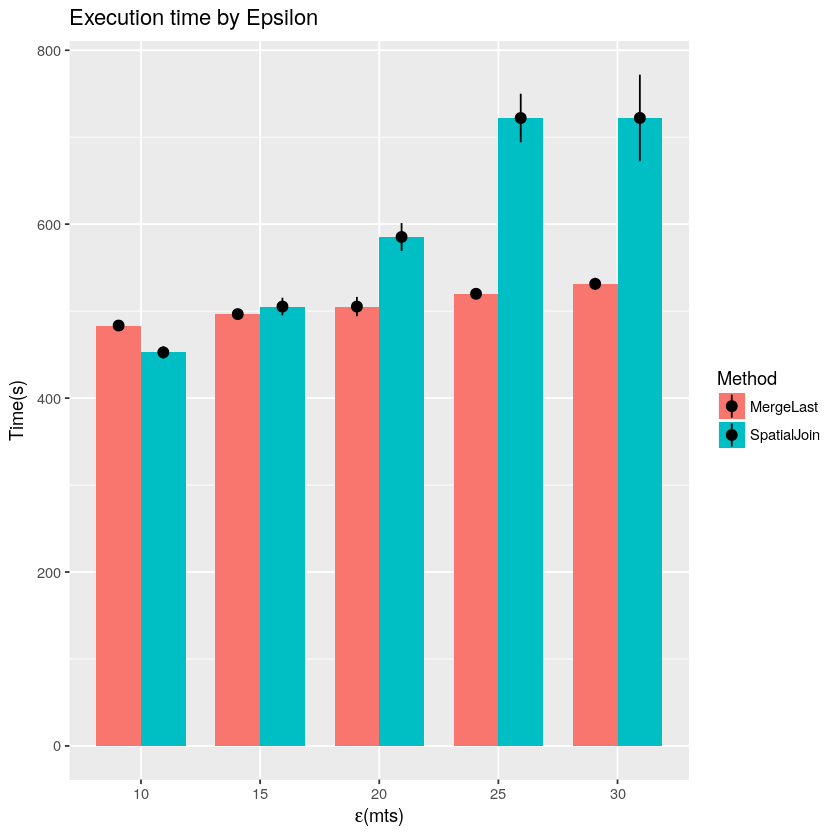

In [48]:
title = "Execution time by Epsilon"
g = ggplot(data=df, aes(x=factor(Epsilon), y=Time.m, fill=Method, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)


In [63]:
stages = read.csv(paste0(RESEARCH_HOME, PATH, 'stages_epsilon.csv'), header = F, sep = ";")
names(stages) = c("runID", "stageID", "Method", "Epsilon", "Mu", "Delta", "Stage", "Time")
stages$Epsilon = as.numeric(as.character(stages$Epsilon))
stages$Mu      = as.numeric(as.character(stages$Mu))
stages$Delta   = as.numeric(as.character(stages$Delta))
stages$Time    = as.numeric(as.character(stages$Time))
stages = stages[stages$Stage != "Running MergeLast", ]

stages = stages[stages$Method == "MergeLast",]
stages = summaryBy(data=stages, Time ~ Method + Epsilon + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })
head(stages, n = 15)


Method,Epsilon,Stage,Time.m,Time.s
MergeLast,10,0.Reporting locations,5.040714,0.3771953
MergeLast,10,1.Set of disks for t_i,13.952857,12.7806190
MergeLast,10,2.Set of disks for t_i+delta,30.803429,3.8494468
MergeLast,10,3.Joining timestams,3.733143,0.1945851
MergeLast,10,4.Checking internals,9.350286,0.9824294
MergeLast,15,0.Reporting locations,5.173286,0.3436535
MergeLast,15,1.Set of disks for t_i,14.172571,13.0889982
MergeLast,15,2.Set of disks for t_i+delta,31.362571,3.8219400
MergeLast,15,3.Joining timestams,4.136571,0.2949870
MergeLast,15,4.Checking internals,9.764286,1.0453462


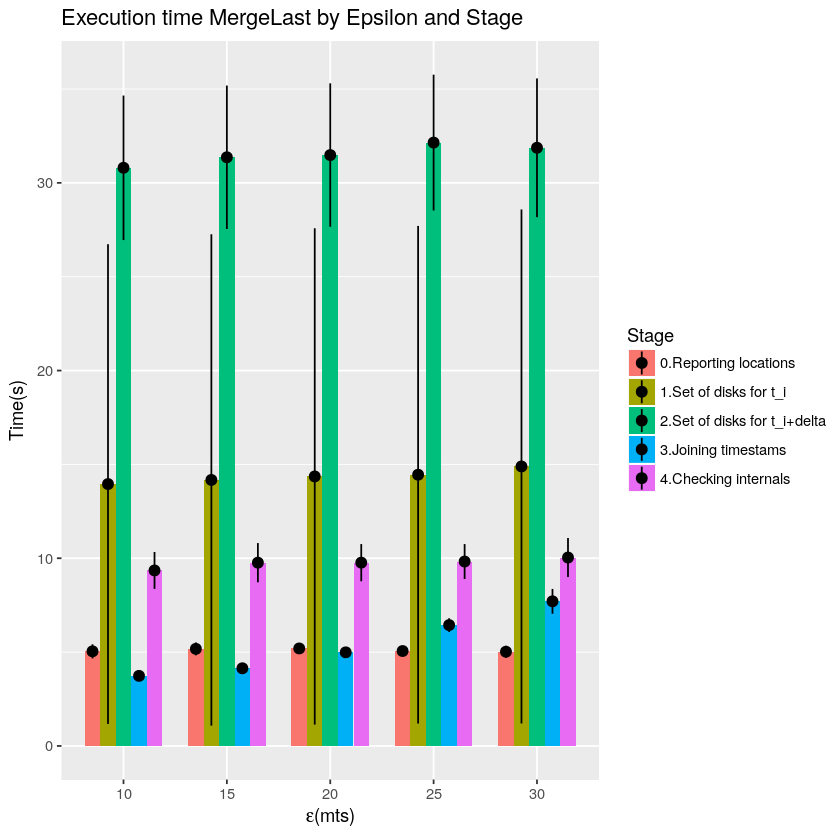

In [64]:
title = "Execution time MergeLast by Epsilon and Stage"
g = ggplot(data=stages, aes(x=factor(Epsilon), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)


In [65]:
stages = read.csv(paste0(RESEARCH_HOME, PATH, 'stages_epsilon.csv'), header = F, sep = ";")
names(stages) = c("runID", "stageID", "Method", "Epsilon", "Mu", "Delta", "Stage", "Time")
stages$Epsilon = as.numeric(as.character(stages$Epsilon))
stages$Mu      = as.numeric(as.character(stages$Mu))
stages$Delta   = as.numeric(as.character(stages$Delta))
stages$Time    = as.numeric(as.character(stages$Time))
stages = stages[stages$Stage != "Running SpatialJoin", ]

stages = stages[stages$Method == "SpatialJoin",]
stages = summaryBy(data=stages, Time ~ Method + Epsilon + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })
head(stages, n = 15)


Method,Epsilon,Stage,Time.m,Time.s
SpatialJoin,10,0.Reporting locations,5.0883636,0.4701724
SpatialJoin,10,1.Set of disks for t_i,28.0189091,5.0414279
SpatialJoin,10,2.Distance Join phase,3.7920000,0.9103330
SpatialJoin,10,3.Getting candidates,1.8594000,0.3782797
SpatialJoin,10,4.Found flocks,0.5089091,0.1974342
SpatialJoin,10,5.Updating times,0.5776364,0.2020631
SpatialJoin,10,6.Filter phase,0.8583636,0.2104296
SpatialJoin,15,0.Reporting locations,4.9087879,0.3216357
SpatialJoin,15,1.Set of disks for t_i,28.0469697,5.8036743
SpatialJoin,15,2.Distance Join phase,5.4528889,1.4224044


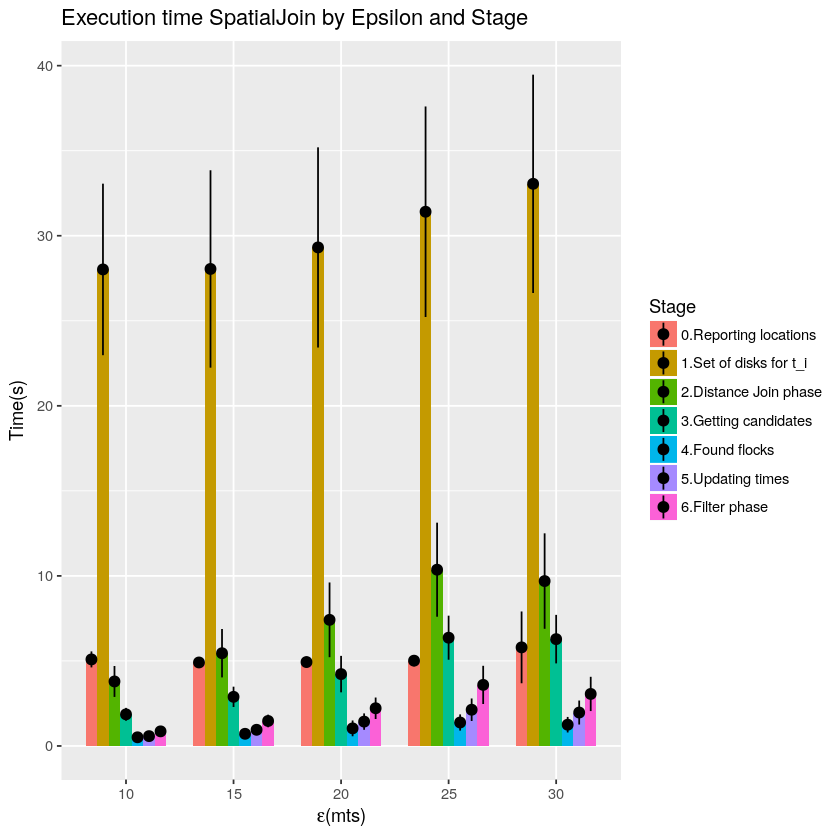

In [66]:
title = "Execution time SpatialJoin by Epsilon and Stage"
g = ggplot(data=stages, aes(x=factor(Epsilon), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)


In [67]:
data = read.csv(paste0(RESEARCH_HOME, PATH, 'methods_delta.csv'), header = F, sep = ";")
names(data) = c("runID", "Method", "Epsilon", "Mu", "Delta", "Time")
data$Epsilon = as.numeric(as.character(data$Epsilon))
data$Mu      = as.numeric(as.character(data$Mu))
data$Delta   = as.numeric(as.character(data$Delta))
data$Time    = as.numeric(as.character(data$Time))

df = summaryBy(data=data, Time ~ Epsilon + Mu + Delta + Method, FUN = function(x){ c(m=mean(x), s=sd(x)) })
df

Epsilon,Mu,Delta,Method,Time.m,Time.s
30,4,3,MergeLast,641.5292,116.504948
30,4,3,SpatialJoin,619.2548,12.763986
30,4,4,MergeLast,564.5756,8.385703
30,4,4,SpatialJoin,633.2694,6.662870
30,4,5,MergeLast,534.4168,6.950416
30,4,5,SpatialJoin,646.5072,7.386751
30,4,6,MergeLast,493.6746,5.790759
30,4,6,SpatialJoin,662.3992,8.573007


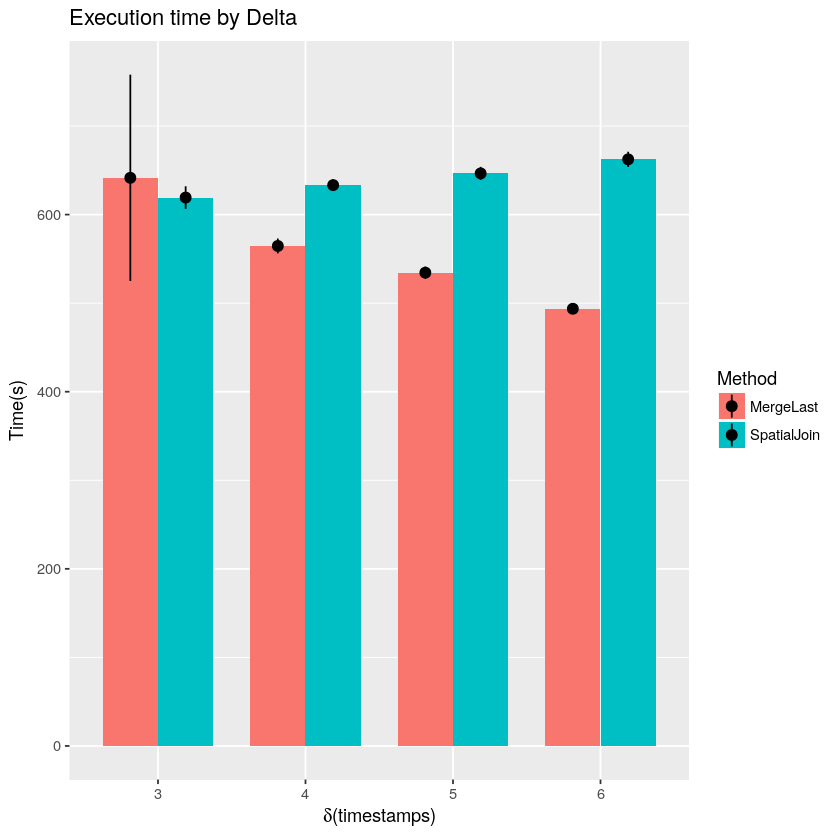

In [68]:
title = "Execution time by Delta"
g = ggplot(data=df, aes(x=factor(Delta), y=Time.m, fill=Method, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(delta,"(timestamps)"))) 
plot(g)

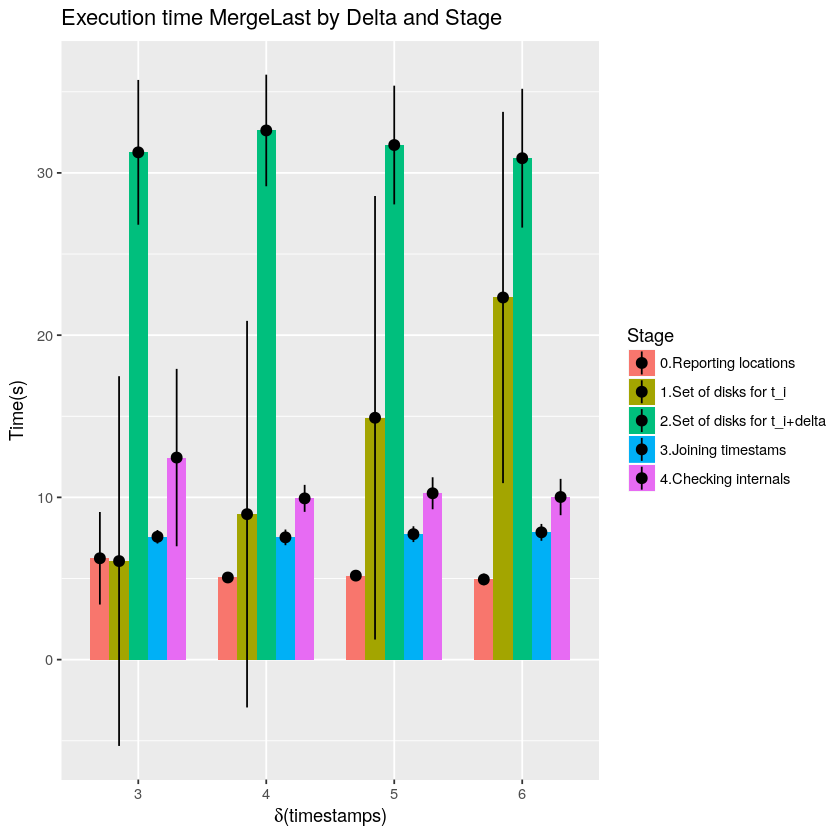

In [74]:
stages = read.csv(paste0(RESEARCH_HOME, PATH, 'stages_delta.csv'), header = F, sep = ";")
names(stages) = c("runID", "stageID", "Method", "Epsilon", "Mu", "Delta", "Stage", "Time")
stages$Epsilon = as.numeric(as.character(stages$Epsilon))
stages$Mu      = as.numeric(as.character(stages$Mu))
stages$Delta   = as.numeric(as.character(stages$Delta))
stages$Time    = as.numeric(as.character(stages$Time))
stages = stages[stages$Stage != "Running MergeLast", ]

stages = stages[stages$Method == "MergeLast",]
stages = summaryBy(data=stages, Time ~ Method + Delta + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })

title = "Execution time MergeLast by Delta and Stage"
g = ggplot(data=stages, aes(x=factor(Delta), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(delta,"(timestamps)"))) 
plot(g)

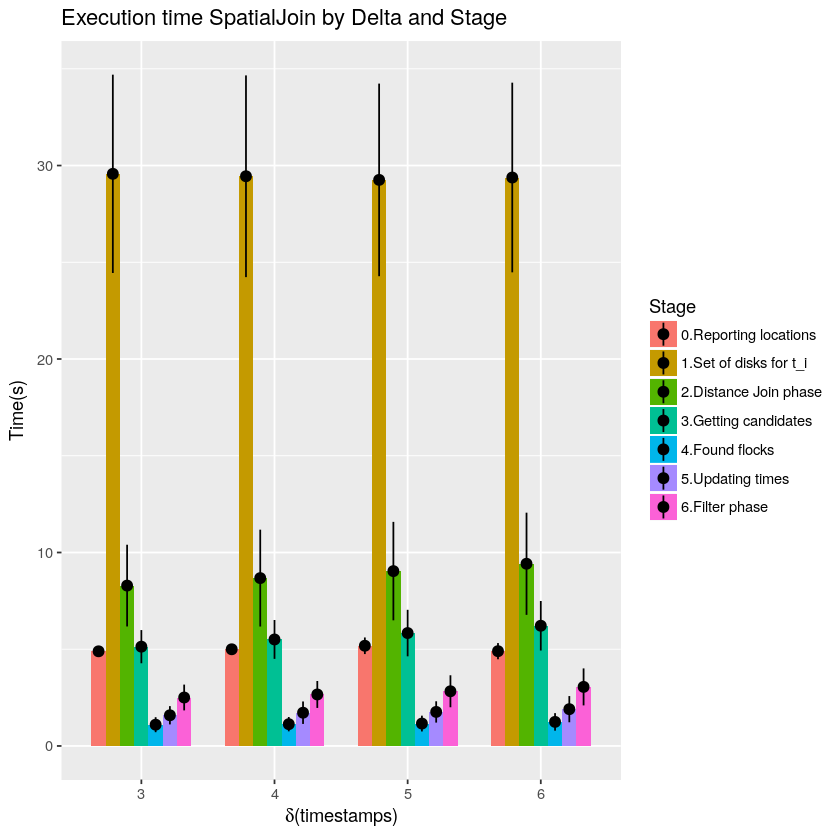

In [75]:
stages = read.csv(paste0(RESEARCH_HOME, PATH, 'stages_delta.csv'), header = F, sep = ";")
names(stages) = c("runID", "stageID", "Method", "Epsilon", "Mu", "Delta", "Stage", "Time")
stages$Epsilon = as.numeric(as.character(stages$Epsilon))
stages$Mu      = as.numeric(as.character(stages$Mu))
stages$Delta   = as.numeric(as.character(stages$Delta))
stages$Time    = as.numeric(as.character(stages$Time))
stages = stages[stages$Stage != "Running SpatialJoin", ]

stages = stages[stages$Method == "SpatialJoin",]
stages = summaryBy(data=stages, Time ~ Method + Delta + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })

title = "Execution time SpatialJoin by Delta and Stage"
g = ggplot(data=stages, aes(x=factor(Delta), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(delta,"(timestamps)"))) 
plot(g)

In [76]:
data = read.csv(paste0(RESEARCH_HOME, PATH, 'methods_mu.csv'), header = F, sep = ";")
names(data) = c("runID", "Method", "Epsilon", "Mu", "Delta", "Time")
data$Epsilon = as.numeric(as.character(data$Epsilon))
data$Mu      = as.numeric(as.character(data$Mu))
data$Delta   = as.numeric(as.character(data$Delta))
data$Time    = as.numeric(as.character(data$Time))

df = summaryBy(data=data, Time ~ Epsilon + Mu + Delta + Method, FUN = function(x){ c(m=mean(x), s=sd(x)) })
df

Epsilon,Mu,Delta,Method,Time.m,Time.s
30,3,5,MergeLast,778.2196,143.024927
30,3,5,SpatialJoin,779.3038,2.017583
30,4,5,MergeLast,536.8898,4.503238
30,4,5,SpatialJoin,644.7652,4.976606
30,5,5,MergeLast,511.7100,7.101651
30,5,5,SpatialJoin,630.5092,8.354047
30,6,5,MergeLast,504.7188,5.380213
30,6,5,SpatialJoin,524.6336,9.569199


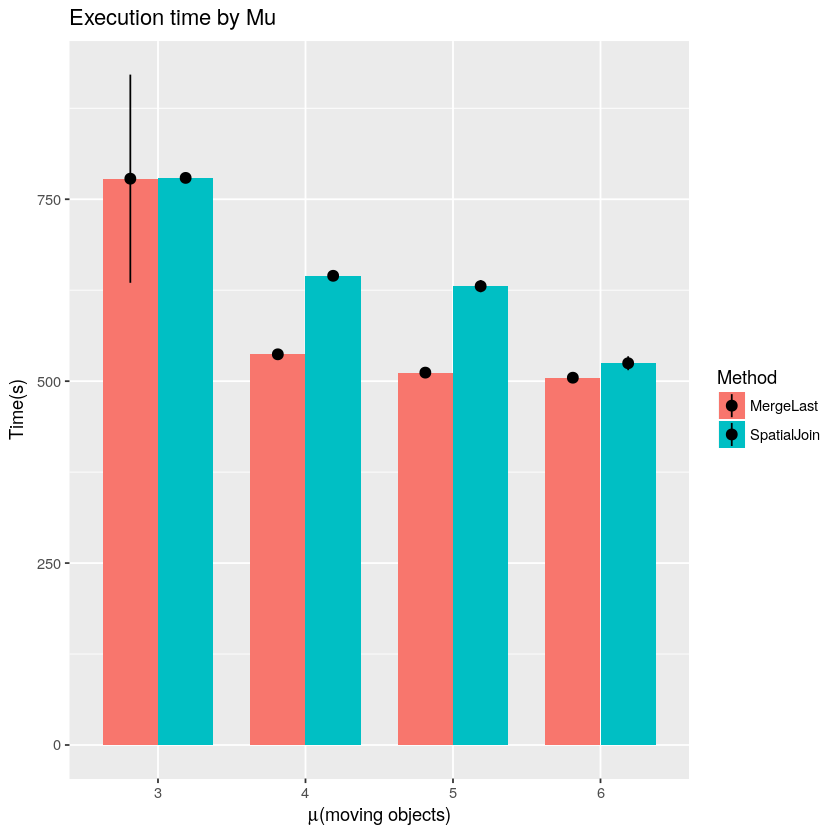

In [77]:
title = "Execution time by Mu"
g = ggplot(data=df, aes(x=factor(Mu), y=Time.m, fill=Method, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(mu,"(moving objects)"))) 
plot(g)

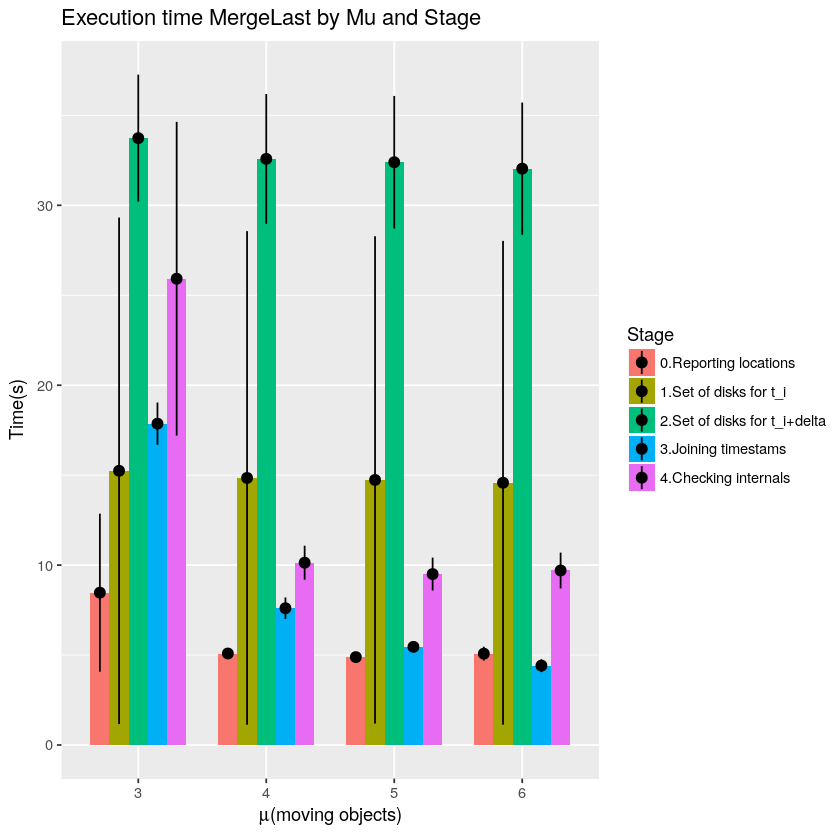

In [78]:
stages = read.csv(paste0(RESEARCH_HOME, PATH, 'stages_mu.csv'), header = F, sep = ";")
names(stages) = c("runID", "stageID", "Method", "Epsilon", "Mu", "Delta", "Stage", "Time")
stages$Epsilon = as.numeric(as.character(stages$Epsilon))
stages$Mu      = as.numeric(as.character(stages$Mu))
stages$Delta   = as.numeric(as.character(stages$Delta))
stages$Time    = as.numeric(as.character(stages$Time))
stages = stages[stages$Stage != "Running MergeLast", ]

stages = stages[stages$Method == "MergeLast",]
stages = summaryBy(data=stages, Time ~ Method + Mu + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })

title = "Execution time MergeLast by Mu and Stage"
g = ggplot(data=stages, aes(x=factor(Mu), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(mu,"(moving objects)"))) 
plot(g)

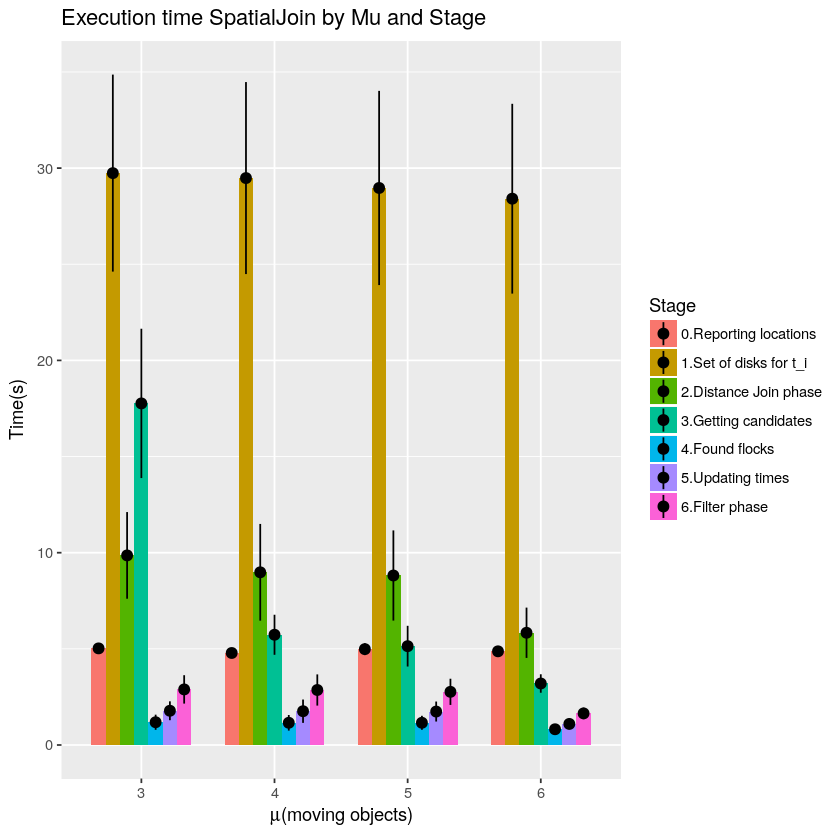

In [79]:
stages = read.csv(paste0(RESEARCH_HOME, PATH, 'stages_mu.csv'), header = F, sep = ";")
names(stages) = c("runID", "stageID", "Method", "Epsilon", "Mu", "Delta", "Stage", "Time")
stages$Epsilon = as.numeric(as.character(stages$Epsilon))
stages$Mu      = as.numeric(as.character(stages$Mu))
stages$Delta   = as.numeric(as.character(stages$Delta))
stages$Time    = as.numeric(as.character(stages$Time))
stages = stages[stages$Stage != "Running SpatialJoin", ]

stages = stages[stages$Method == "SpatialJoin",]
stages = summaryBy(data=stages, Time ~ Method + Mu + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })

title = "Execution time SpatialJoin by Mu and Stage"
g = ggplot(data=stages, aes(x=factor(Mu), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(mu,"(moving objects)"))) 
plot(g)